In [14]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 325.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/9.8 MB 744.7 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.8 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 7.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.8 MB 8.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.1/9.8 MB 9.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.8 MB 9.7 MB/s eta 0:00:01
   --------------------- ------------------ 5.3/9.8 MB 10.0 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# ETL


In [179]:
import pandas as pd

df_companies = pd.read_csv('Time_series\sp500_companies.csv')
df_index = pd.read_csv('Time_series\sp500_index.csv')
df_stocks = pd.read_csv('Time_series\sp500_stocks.csv')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lucab\AppData\Local\Temp\ipykernel_25972\1670271342.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_companies = pd.read_csv('Time_series\sp500_companies.csv')
C:\Users\lucab\AppData\Local\Temp\ipykernel_25972\1670271342.py:4: SyntaxWarning: invalid escape sequence '\s'
  df_index = pd.read_csv('Time_series\sp500_index.csv')
C:\Users\lucab\AppData\Local\Temp\ipykernel_25972\1670271342.py:5: SyntaxWarning: invalid escape sequence '\s'
  df_stocks = pd.read_csv('Time_series\sp500_stocks.csv')


In [3]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,146.27,3588003201024,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.064138
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,225.12,3402868719616,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.060828
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,425.20,3161311150080,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.056510
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,214.10,2251261739008,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040243
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,178.88,2198936223744,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039307


In [180]:
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_index.head()


,Date,S&P500
0,2014-11-13,2039.33
1,2014-11-14,2039.82
2,2014-11-17,2041.32
3,2014-11-18,2051.80
4,2014-11-19,2048.72


In [33]:
print(f"Nel DF sono presenti info di {len(df_stocks["Symbol"].unique())} società")
print(f"Lunghezza complessiva: {len(df_stocks)}")
print(f"Nel DF sono presenti num data di {len(df_stocks["Date"].unique())}")
df_stocks.head(20)

Nel DF sono presenti info di 503 società
Lunghezza complessiva: 1882226
Nel DF sono presenti num data di 3742


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0
5,2010-01-11,MMM,46.959095,70.217392,70.735786,69.740807,70.551842,3500812.0
6,2010-01-12,MMM,46.998230,70.275917,70.384613,69.648827,69.882942,3626033.0
7,2010-01-13,MMM,46.847260,70.050163,70.326088,69.565216,70.326088,3709992.0
8,2010-01-14,MMM,46.690697,69.816055,70.175583,69.749161,70.016724,3150384.0
9,2010-01-15,MMM,46.618008,69.707359,70.309364,69.289299,69.832779,4730180.0


## Previsione valore S&P500

Obiettivo: Prevedere prezzo dei primi 6 mesi del 2025

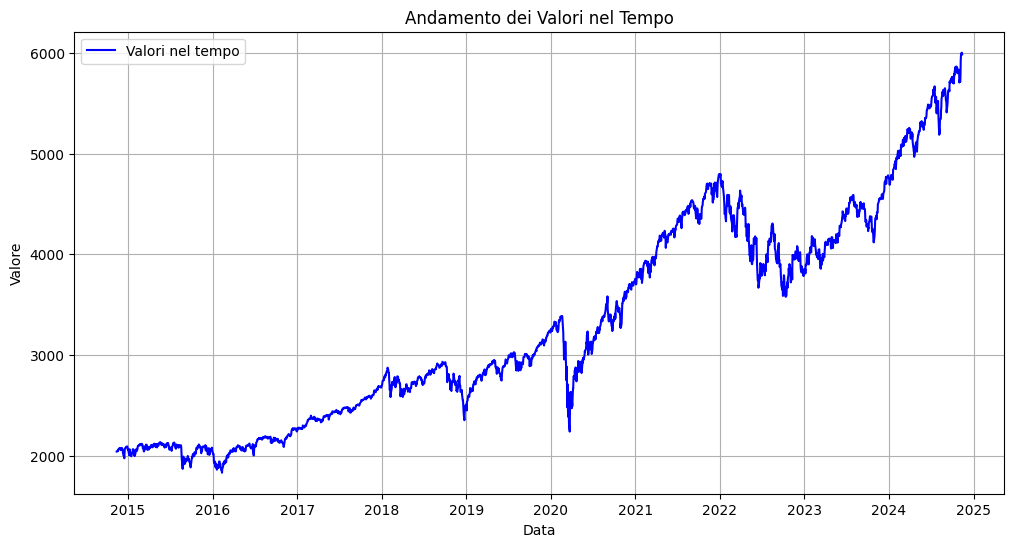

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che il tuo DataFrame si chiami 'df' e contenga le colonne 'Date' e 'Value'
# Assicurati che la colonna 'Date' sia di tipo datetime

# Esempio di DataFrame
# df = pd.DataFrame({
#     'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
#     'Value': range(100)
# })


# Imposta la colonna 'Date' come indice
plt.figure(figsize=(12, 6))  # Dimensione del grafico
plt.plot(df_index['Date'], df_index['S&P500'], label='Valori nel tempo', color='blue')

# Aggiungi dettagli al grafico
plt.title('Andamento dei Valori nel Tempo')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.show()

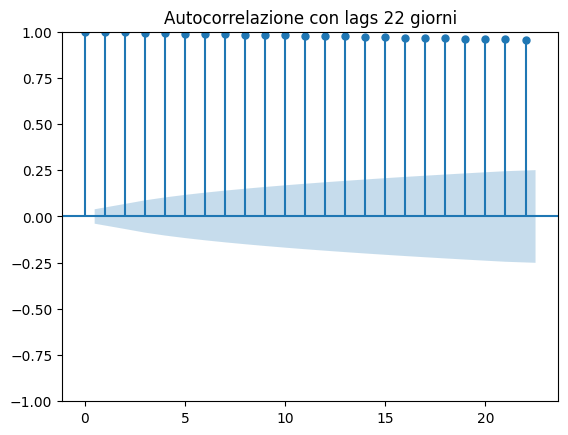

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
lags = 22
plot_acf(df_index['S&P500'], lags=lags)
plt.title(f'Autocorrelazione con lags {lags} giorni')
plt.show()


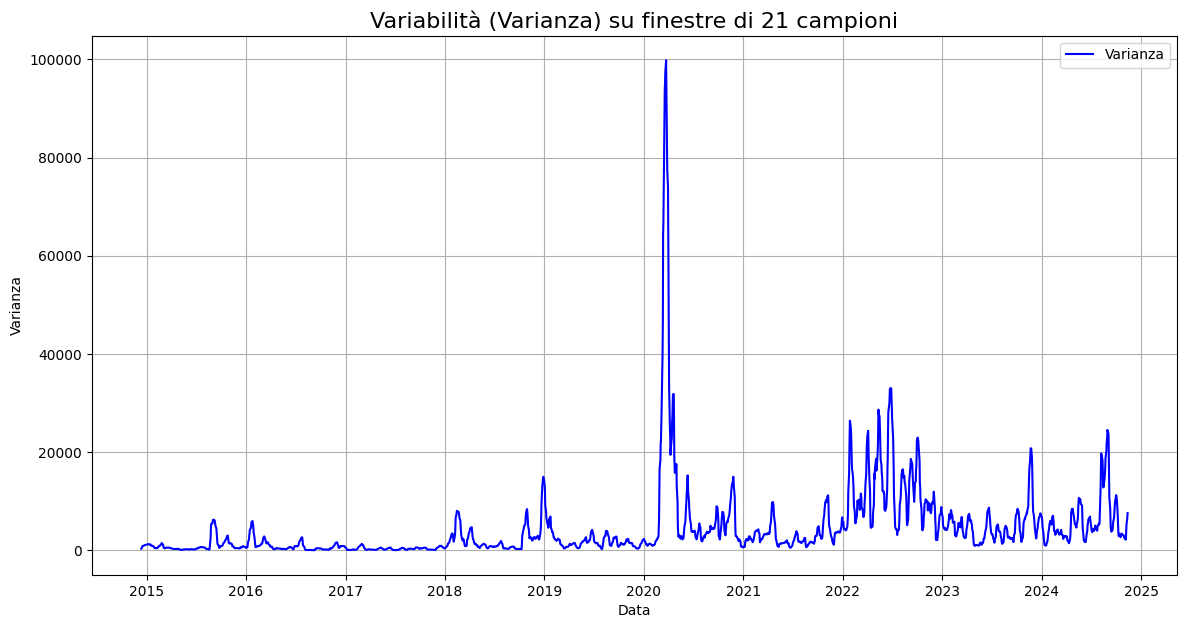

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che df_index['S&P500'] contenga la serie temporale
# Calcoliamo la deviazione standard su finestre di 30 campioni
window_size = 21
rolling_std = df_index['S&P500'].rolling(window=window_size).var()

# Creiamo un grafico della deviazione standard
plt.figure(figsize=(14, 7))
plt.plot(rolling_std, label='Varianza', color='b')
plt.title(f'Variabilità (Varianza) su finestre di {window_size} campioni', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Varianza')
plt.legend()
plt.grid(True)
plt.show()


### Analisi stagionalità, trend, residui, stazionarietà



Dalle precedenti analisi si puo notare come la variabilità su una finestra mensile(21/22 giorni) è mediamente bassa, mentre l'autocorrelazione è molto alta. 

Detto ciò, possiamo aggregare per mesi.

In [196]:
import copy
import pandas as pd

# Supponiamo che il tuo dataset sia caricato in un DataFrame chiamato 'df'
# df = pd.read_csv("path_to_your_file.csv")s

df_copy = copy.deepcopy(df_index)

# Impostiamo la colonna 'Date' come indice
df_copy.set_index('Date', inplace=True)

# Aggregare per mese, calcolando la media del 'S&P500'
df_monthly = df_copy.resample('M')['S&P500'].mean().reset_index()

# Formattare la colonna 'Date' nel formato anno/mese
df_monthly['Date'] = df_monthly['Date'].dt.to_period('M')

# Ora 'df_monthly' contiene la data in formato anno/mese (es. 2024-01)
df_monthly.head(120)



C:\Users\lucab\AppData\Local\Temp\ipykernel_25972\101569497.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_copy.resample('M')['S&P500'].mean().reset_index()


,Date,S&P500
0,2014-11,2055.824545
1,2014-12,2054.266364
2,2015-01,2028.178500
3,2015-02,2082.195789
4,2015-03,2079.990455
...,...,...
115,2024-06,5415.140526
116,2024-07,5538.004545
117,2024-08,5478.214545
118,2024-09,5621.260500


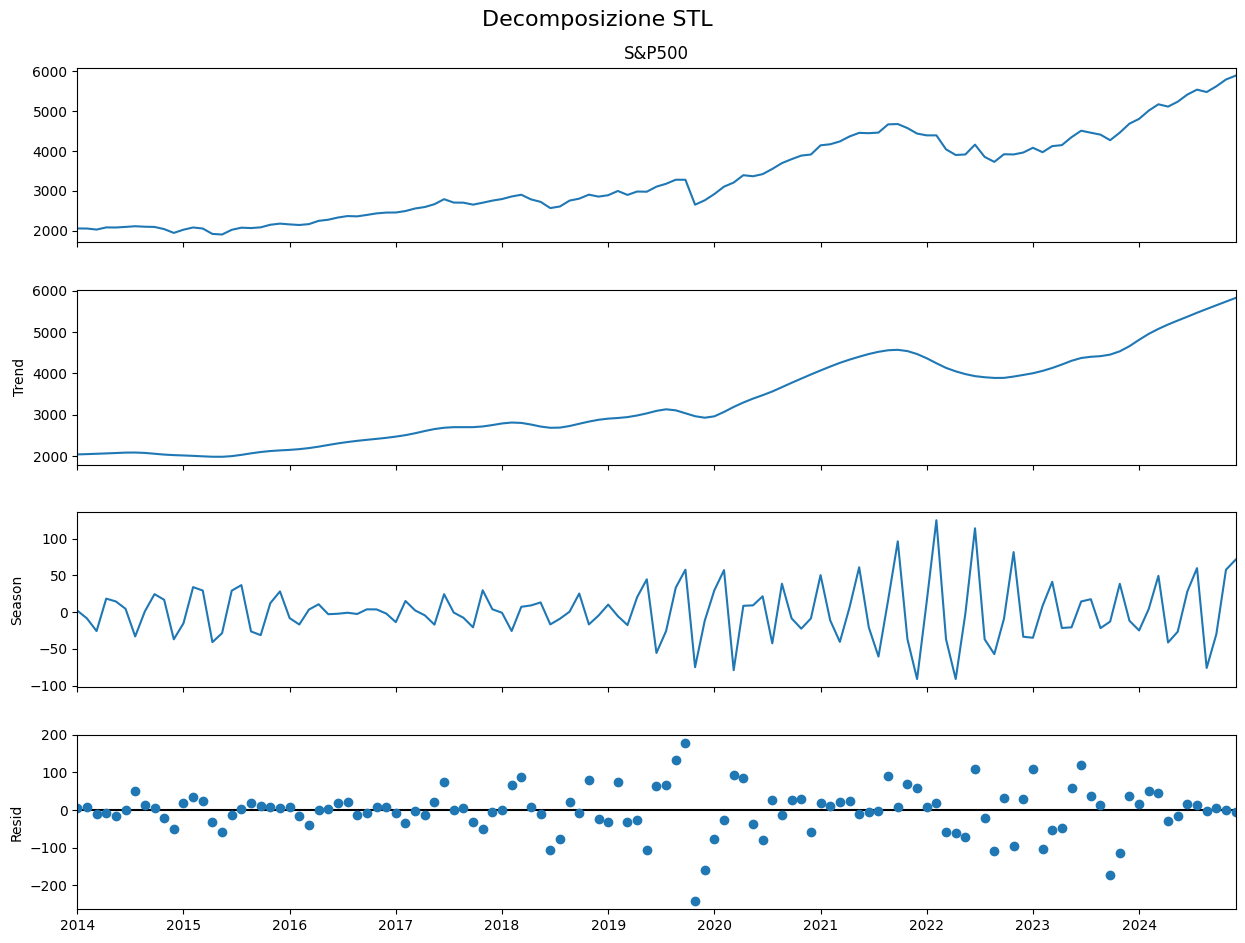

In [203]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Supponiamo che 'df_monthly' contenga la colonna 'Date' in formato 'Period' (anno/mese)
# e la colonna 'S&P500' con i dati mensili aggregati

# Decomposizione STL
stl = STL(df_monthly['S&P500'], period=4)  # Scegli un periodo adatto ai tuoi dati
result = stl.fit()

# Plot della decomposizione
fig = result.plot()
fig.set_size_inches(14, 10)

# Titolo della figura
plt.suptitle('Decomposizione STL', fontsize=16)

# Impostare le etichette dell'asse X per visualizzare solo gli anni
years = df_monthly['Date'].dt.year.unique()  # Ottieni gli anni unici dalla colonna 'Date'

# Impostare i tick sull'asse X in corrispondenza degli anni
plt.gca().set_xticks(range(0, len(df_monthly), len(df_monthly)//len(years)))

# Impostare le etichette dell'asse X come gli anni
plt.gca().set_xticklabels(years, rotation=0)

# Visualizza il grafico
plt.show()


In [186]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Funzione per eseguire il test ADF
def adf_test(series):
    result = adfuller(series)
    return result  # Restituisce tutti i valori del test ADF

# Funzione principale per differenziare la serie fino a renderla stazionaria
def make_stationary(df, column_name):
    series = df[column_name]
    adf_results = []  # Lista per salvare i risultati di ogni test ADF
    result = adf_test(series)  # Primo test ADF
    p_value = result[1]  # Ottieni il p-value iniziale
    diff_count = 0
    
    # Ciclo per differenziare finché il p-value non è inferiore a 0.05
    while p_value > 0.05:
        series = series.diff().dropna()  # Differenzia la serie
        result = adf_test(series)  # Ottieni tutti i risultati
        adf_results.append(result)  # Aggiungi il risultato alla lista
        p_value = result[1]  # Aggiorna il p-value
        diff_count += 1
        
        print(f"Differenziazione {diff_count}: p-value = {p_value:.4f}")
    
    # Visualizza la serie differenziata finale
    plt.figure(figsize=(10, 6))
    plt.plot(series)
    plt.title(f"Serie Stazionaria dopo {diff_count} differenziazioni")
    plt.xlabel('Data')
    plt.ylabel(column_name)
    plt.show()
    
    # Restituisce la serie finale, il numero di differenziazioni e i risultati del test ADF
    return series, diff_count, adf_results



Differenziazione 1: p-value = 0.0000


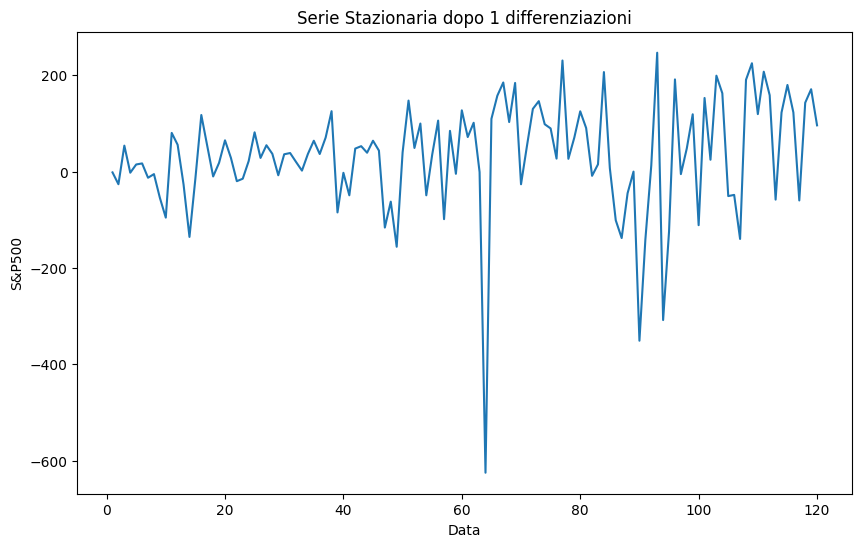


Risultato ADF dopo 1 differenziazioni:
Statistic Value: -9.518222836090834
p-value: 3.115288119142481e-16
Number of Lags Used: 0
Number of Observations Used: 119
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


In [187]:
# Applicare la funzione per rendere la serie stazionaria
final_series, n_diffs, adf_results = make_stationary(df_monthly, 'S&P500')

# Stampa i risultati del test ADF per ogni differenziazione
for i, result in enumerate(adf_results):
    print(f"\nRisultato ADF dopo {i+1} differenziazioni:")
    print(f"Statistic Value: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Number of Lags Used: {result[2]}")
    print(f"Number of Observations Used: {result[3]}")
    print(f"Critical Values: {result[4]}")